In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [76]:
df = pd.read_csv('placement.csv')
df.rename(columns={'placement_exam_marks':'mark'},inplace=True)
df.head(4)

,cgpa,mark,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1


In [28]:
df.shape

(1000, 3)

Text(0.5, 1.0, 'MARK')

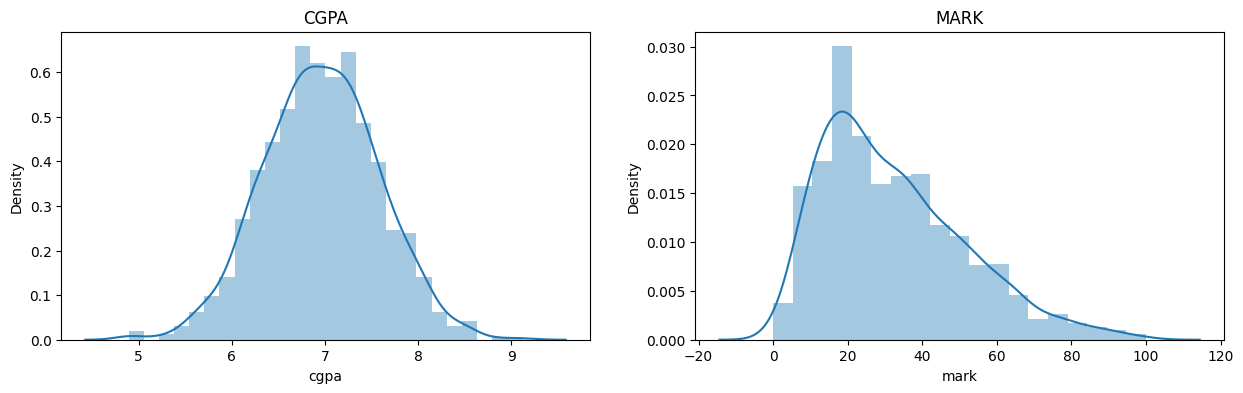

In [16]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.title('CGPA')

plt.subplot(1,2,2)
sns.distplot(df['mark'])
plt.title('MARK')

# Trimming

In [17]:
print('Mean',df['cgpa'].mean())
print('min',df['cgpa'].min())
print('Max',df['cgpa'].max())
print('std',df['cgpa'].std())

Mean 6.96124
min 4.89
Max 9.12
std 0.6158978751323896


In [23]:
df['cgpa'].mean() - 3*df['cgpa'].std()

5.113546374602832

In [24]:
df['cgpa'].mean() + 3*df['cgpa'].std()

8.808933625397168

In [27]:
df[(df['cgpa'].mean() - 3*df['cgpa'].std() > df['cgpa']) | (df['cgpa'].mean() + 3*df['cgpa'].std() < df['cgpa'])]

,cgpa,mark,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [31]:
new_df = df[(df['cgpa'].mean() - 3*df['cgpa'].std() < df['cgpa']) & (df['cgpa'].mean() + 3*df['cgpa'].std() > df['cgpa'])]
new_df.shape

(995, 3)

# Z-SCORE

In [85]:
df['Zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [86]:
df.head()

,cgpa,mark,placed,Zscore
0,7.19,26.0,1,0.372949
1,7.46,38.0,1,0.813630
2,7.54,40.0,1,0.944202
3,6.42,8.0,1,-0.883807
4,7.23,17.0,0,0.438235


In [88]:
df[(df['Zscore'] > 3) | (df['Zscore'] < -3)]

,cgpa,mark,placed,Zscore
485,5.113546,44.0,1,-3.016137
995,8.808934,44.0,1,3.015293
996,8.808934,65.0,1,3.015293
997,5.113546,34.0,0,-3.016137
999,5.113546,10.0,1,-3.016137


# Capping

In [77]:
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()
lower_limit

5.113546374602832

In [78]:
higher_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
higher_limit

8.808933625397168

In [79]:
df['cgpa'] = np.where(
    df['cgpa']>higher_limit,
    higher_limit, 
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [80]:
df['cgpa'].min()

5.113546374602832

In [81]:
df['cgpa'].max()

8.808933625397168